In [181]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [182]:
def calculate_distance(p, q):
    """ Calculate Euclidean distance between two points."""
    # Assuming that there are only 2 dimensions to the points (e.g. x and y)
    distance = np.sqrt((float(p[0])-float(q[0]))**2 + (float(p[1])-float(q[1]))**2 )
    return distance

In [183]:
calculate_distance([1,1], [2,2])

1.4142135623730951

In [216]:
def neighbor_vote(labels):
    """ Get the majority label from k neighbors."""
    # Is it possible to have a tie? How would you handle that?
    # labels should be a list of [label, distance]
    
    labels_only = [i[0] for i in labels]
    # create a dictionary with key = labels and key = number of those labels
    vote_dict = {i: labels_only.count(i) for i in labels_only}
    
    # create a list of the keys that have the max count
    vote_list = [x for x,y in vote_dict.items() if y == max(vote_dict.values())]
    
    # dealing with distances
    # if odd number of labels
    if len(labels) % 2 != 0:
        vote = vote_list[0]
    
    # if even number of labels
    else:

        # and the vote_list has more than 1 item
        # class, count, total distance
        if len(vote_list) > 1:
            # create a dictionary with keys = labels with max counts and key = total distance of those labels
            vote_dict_2 = {i: sum([x[1] for x in labels if x[0] == i]) for i in vote_list}
            
            # create a list of the keys that have the min distance
            vote_list_2 = [x for x, y in vote_dict.items() if y == min(vote_dict_2.values())]
            vote = vote_list_2[0]
        else:
            # if there's no tie, then just return whatever is in vote list
            vote = vote_list[0]
    return vote

In [270]:
def knn_classifier(labeled_points, new_point, k):
    """ Given classified points and one new point, return a prediction based on the votes of k neighbors."""
    # labeled points should be a df with columns [label, x, y]
    df = labeled_points.copy()
    df.columns = ['label', 'x', 'y']
    df['distance'] = [calculate_distance([df.ix[i,'x'],\
                                                df.ix[i,'y']], new_point)\
                                  for i in range(len(df))]
#     return df
    df = df.sort_values(by='distance')
    top_k = df.head(k)
    top_k = top_k.reset_index(drop=True)
    top_k_labels = [[top_k.ix[i, 'label'], top_k.ix[i, 'distance']] for i in range(k)]
    #return top_k_labels
    prediction = neighbor_vote(top_k_labels)
    return prediction

In [271]:
# import data
iris = datasets.load_iris()
X = iris.data[:100, :2]  # use the first two features and just the first two classes.
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Split 70/30 into initial data and new points to classify
training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

In [272]:
training_df.head()

,class,feature1,feature2
0,0,4.8,3.4
1,0,4.6,3.2
2,1,6.0,3.4
3,0,5.2,3.4
4,1,5.0,2.3


In [273]:
""" Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy."""
kf =5
test_df['predictions'] = [knn_classifier(training_df, [test_df.ix[i, 'feature1'],\
                                                       test_df.ix[i, 'feature2']], kf) for i in range(len(test_df))]

# for i in range(len(test_df)):
#     new = [test_df.ix[i, 'feature1'], test_df.ix[i, 'feature2']]
#     print knn_classifier(training_df, new, 5)

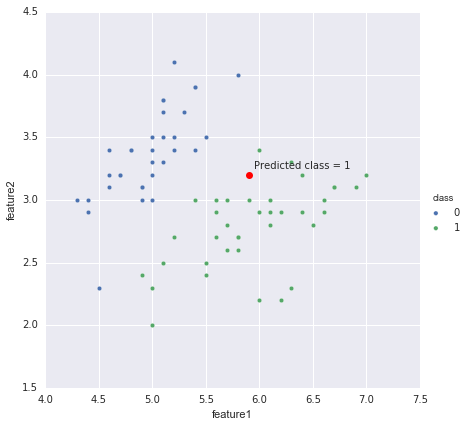

In [274]:
""" BONUS: plot the labeled points and an example of a new point being classified."""
sns.pairplot(training_df,x_vars='feature1', y_vars='feature2', hue='class', size=6);
test_point = 2
new_x = test_df.ix[test_point, 'feature1']
new_y = test_df.ix[test_point, 'feature2']
plt.plot(new_x,new_y, 'ro');
plt.annotate('Predicted class = {}'.format(test_df.ix[test_point, 'predictions']), (new_x+0.05,new_y+0.05));

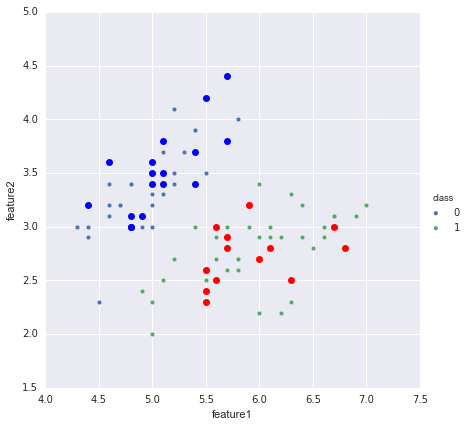

In [285]:
""" BONUS: plot the labeled points and an example of a new point being classified."""
sns.pairplot(training_df,x_vars='feature1', y_vars='feature2', hue='class', markers='o', size=6);
for i in range(len(test_df)):
    new_x = test_df.ix[i, 'feature1']
    new_y = test_df.ix[i, 'feature2']
    if test_df.ix[i, 'predictions'] == 1:
        plt.plot(new_x,new_y,'ro');
    else:
        plt.plot(new_x,new_y,'bo');
#     plt.annotate('Predicted class = {}'.format(test_df.ix[test_point, 'predictions']), (new_x+0.05,new_y+0.05));